In this tutorial, I will utilize Kaggle dataset listing the insurance cost information of clients and the various factors affecting the cost in USA. I will use this dataset to develop a predictive model for estimating the annual insurance cost for the clients. We will conduct exploratory data analysis, visualization and preprocessing using pandas, matlplotlib and numpy. For model building, we will utilize **linear regression, polynomial regression, support vector regression, random forest regressor, dense neural networks and Xgboost regressor.** We will find the find the best model and hypertune the best model to improve the prediction accuracy. For model building we will utilize **scikit-learn, XGBoost and tensorflow** libraries.

Let's import all the libraries first.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Now let's read the insurance dataset using the pandas. The data can be read into a pandas DataFrame which can be used to extract all the important information about the dataset. The dataframe is a 2 dimensional where each row represents an observation and each column represents the features of the observation.

Similarly data from a single column can be read using the pandas Series class.

### Exploratory data Analysis

In [2]:
data_path = "insurance.csv"  # data path
df = pd.read_csv(data_path)        # reading the datafile into a pandas dataframe

Let's conduct some investigation of the dataset:

In [3]:
df.info() # Get some basic information about the dataset with all the columns and their data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


There are 1338 rows and 7 columns. In this dataset, there are a total of 1338 insurance clients and associated 7 features. Let's take a look at the first 5 of them using df.head function

In [4]:
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

The dataset shows the age, sex, bmi, number of children, whether a smoker, living region and the insurance charges for the first 5 clients. We can also use df.columns to get the featuress and df.shape to get the size of this dataset.

In [5]:
print(f" The shape of the dataset is {df.shape}") 
print(df.columns)

 The shape of the dataset is (1338, 7)
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


Each column can be accessed via df["feature_name"]. Let's look at the age column and print 20 values

In [6]:
print(df["age"][:20])

0     19
1     18
2     28
3     33
4     32
5     31
6     46
7     37
8     37
9     60
10    25
11    62
12    23
13    56
14    27
15    19
16    52
17    23
18    56
19    30
Name: age, dtype: int64


When there are boolen data types, they can be converted to intiger data type using df["feature_name"].astype("int64"). In this case we don't have any boolean values. We can also use the other data types. 

Let's use take a basics statistics of each numerical column:
df.describe will give the non-null value count, mean, standard deviation, minimum, maximun and different percentile values. By default, the function will output information of all the numerical columns

In [7]:
df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

Other categorical information statistics can be listed as follows

In [8]:
df.describe(include=["object", "bool", "category"]) 


sex smoker     region
count   1338   1338       1338
unique     2      2          4
top     male     no  southeast
freq     676   1064        364

Here we can see that there are 2 unique categories for sex, 2 categories for smokers and 4 categories for the regions. Let's see what are those unique categories.

In [9]:
print(df["sex"].unique())
print(df["smoker"].unique())
print(df["region"].unique())

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


Let's see how much is the count for each of the catogories.


In [10]:
print(df["sex"].value_counts())

sex
male      676
female    662
Name: count, dtype: int64


In [11]:
print(df["smoker"].value_counts())

smoker
no     1064
yes     274
Name: count, dtype: int64


In [12]:
print(df["region"].value_counts())

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


Now let's do some sorting of the data by each column features. First let's sort the data by insurance charges in the descending order and take a look at the first 5 clients. Similary we can sort based on multiple features as well.

In [13]:
df.sort_values(by = ["charges"], ascending = [False]).head()

age     sex     bmi  children smoker     region      charges
543    54  female  47.410         0    yes  southeast  63770.42801
1300   45    male  30.360         0    yes  southeast  62592.87309
1230   52    male  34.485         3    yes  northwest  60021.39897
577    31  female  38.095         1    yes  northeast  58571.07448
819    33  female  35.530         0    yes  northwest  55135.40209

In [14]:
df.sort_values(by = ["age","charges"], ascending = [True, False]).head()

age     sex     bmi  children smoker     region      charges
803   18  female  42.240         0    yes  southeast  38792.68560
759   18    male  38.170         0    yes  southeast  36307.79830
161   18  female  36.850         0    yes  southeast  36149.48350
623   18    male  33.535         0    yes  northeast  34617.84065
57    18    male  31.680         2    yes  southeast  34303.16720

Let's print the min, max and mean of a feature column:

In [15]:
print(df["age"].min(), df["age"].max(), df["age"].mean(), df["age"].median())

18 64 39.20702541106129 39.0


Let's do some slicing of the data:
Use df.loc while using feature names and iloc while using index values of rows and columns.

Interestingly loc will include the starting and last rows whereas the iloc will not include the last column index.


In [16]:
df.loc[0:3, "age": "region"]

age     sex     bmi  children smoker     region
0   19  female  27.900         0    yes  southwest
1   18    male  33.770         1     no  southeast
2   28    male  33.000         3     no  southeast
3   33    male  22.705         0     no  northwest

In [17]:
df.iloc[0:3, 0:4]

age     sex    bmi  children
0   19  female  27.90         0
1   18    male  33.77         1
2   28    male  33.00         3

We can use df.apply function to apply a function in each column of the dataset. Let's look at the maximum values in each column.

In [18]:
df.apply(np.max)

age                  64
sex                male
bmi               53.13
children              5
smoker              yes
region        southwest
charges     63770.42801
dtype: object

Now let's try to do some extraction of the values based on the categories. Let's look at people from north east who are female and aged > 40.

In [19]:
df[(df['sex'] == 'female') & (df['region'] == 'northeast') & (df['age'] > 40)]

age     sex     bmi  children smoker     region      charges
16     52  female  30.780         1     no  northeast  10797.33620
20     60  female  36.005         0     no  northeast  13228.84695
26     63  female  23.085         0     no  northeast  14451.83515
56     58  female  31.825         2     no  northeast  13607.36875
81     45  female  38.285         0     no  northeast   7935.29115
...   ...     ...     ...       ...    ...        ...          ...
1236   63  female  21.660         0     no  northeast  14449.85440
1259   52  female  23.180         0     no  northeast  10197.77220
1264   49  female  33.345         2     no  northeast  10370.91255
1285   47  female  24.320         0     no  northeast   8534.67180
1326   42  female  32.870         0     no  northeast   7050.02130

[79 rows x 7 columns]

### Data Visualization
Now let's do some plotting to get an understanding of the data or to find any obvious correlations/patterns. For plotting let's use the matplotlib package for more flexibility. But we can alway use the df.plot for quick plotting as well.

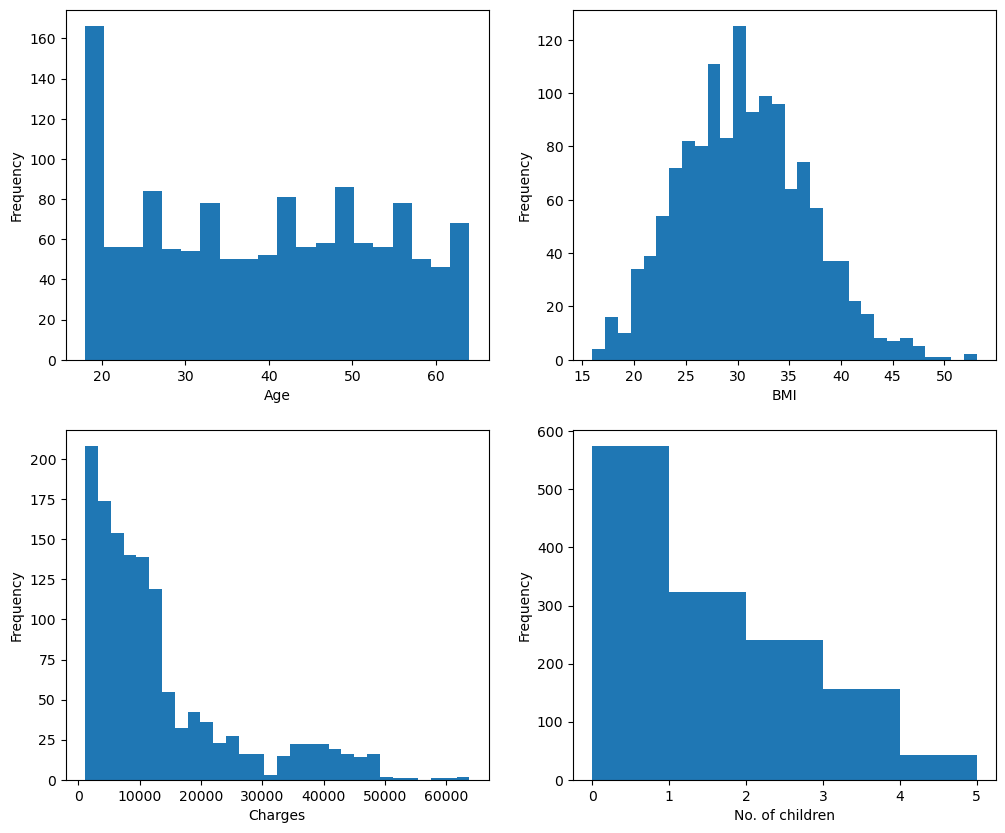

In [20]:
fig = plt.figure(figsize = (12,10))

plt.subplot(2,2,1)
plt.hist(df['age'], bins = 20)
plt.xlabel("Age")
plt.ylabel("Frequency")

plt.subplot(2,2,2)
plt.hist(df['bmi'], bins = 30)
plt.xlabel("BMI")
plt.ylabel("Frequency")

plt.subplot(2,2,3)
plt.hist(df['charges'], bins = 30)
plt.xlabel("Charges")
plt.ylabel("Frequency")

plt.subplot(2,2,4)
plt.hist(df['children'], bins = 5)
plt.xlabel("No. of children")
plt.ylabel("Frequency")

plt.show()

As we can see, the age distribution is mostly random and relatively there is a higher younger population in this dataset. A health BMI is between 18-25, 25-30 is overweight and above 30 is obese. Even though the distribution is more or less Gaussian, most of the population is overweight and obese. Most of the families have less than 10k annual charges and single children.

Now let's see how the charges vary as a function of various factors:
let's look at region wise data:

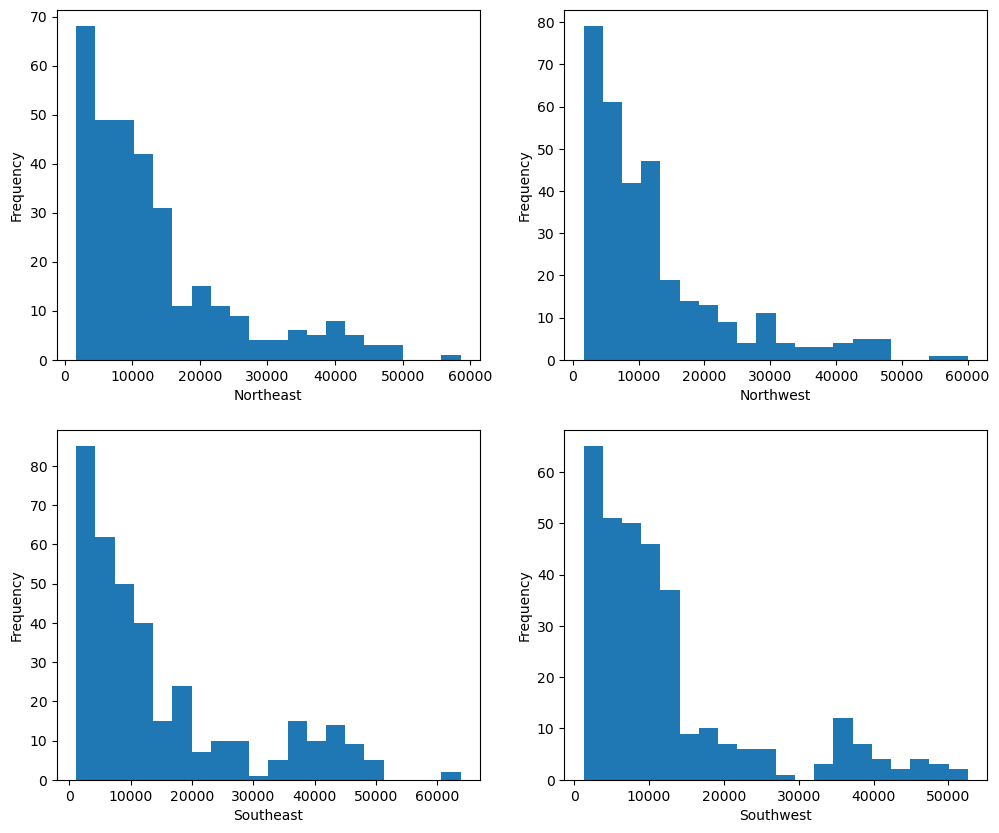

In [21]:
fig = plt.figure(figsize = (12,10))

plt.subplot(2,2,1)
plt.hist(df[df['region'] == 'northeast']['charges'], bins = 20)
plt.xlabel("Northeast")
plt.ylabel("Frequency")

plt.subplot(2,2,2)
plt.hist(df[df['region'] == 'northwest']['charges'], bins = 20)
plt.xlabel("Northwest")
plt.ylabel("Frequency")

plt.subplot(2,2,3)
plt.hist(df[df['region'] == 'southeast']['charges'], bins = 20)
plt.xlabel("Southeast")
plt.ylabel("Frequency")

plt.subplot(2,2,4)
plt.hist(df[df['region'] == 'southwest']['charges'], bins = 20)
plt.xlabel("Southwest")
plt.ylabel("Frequency")

plt.show()

So here we do not see any correlation between regions and associated charges. Now let's compare the charges with other parameters:

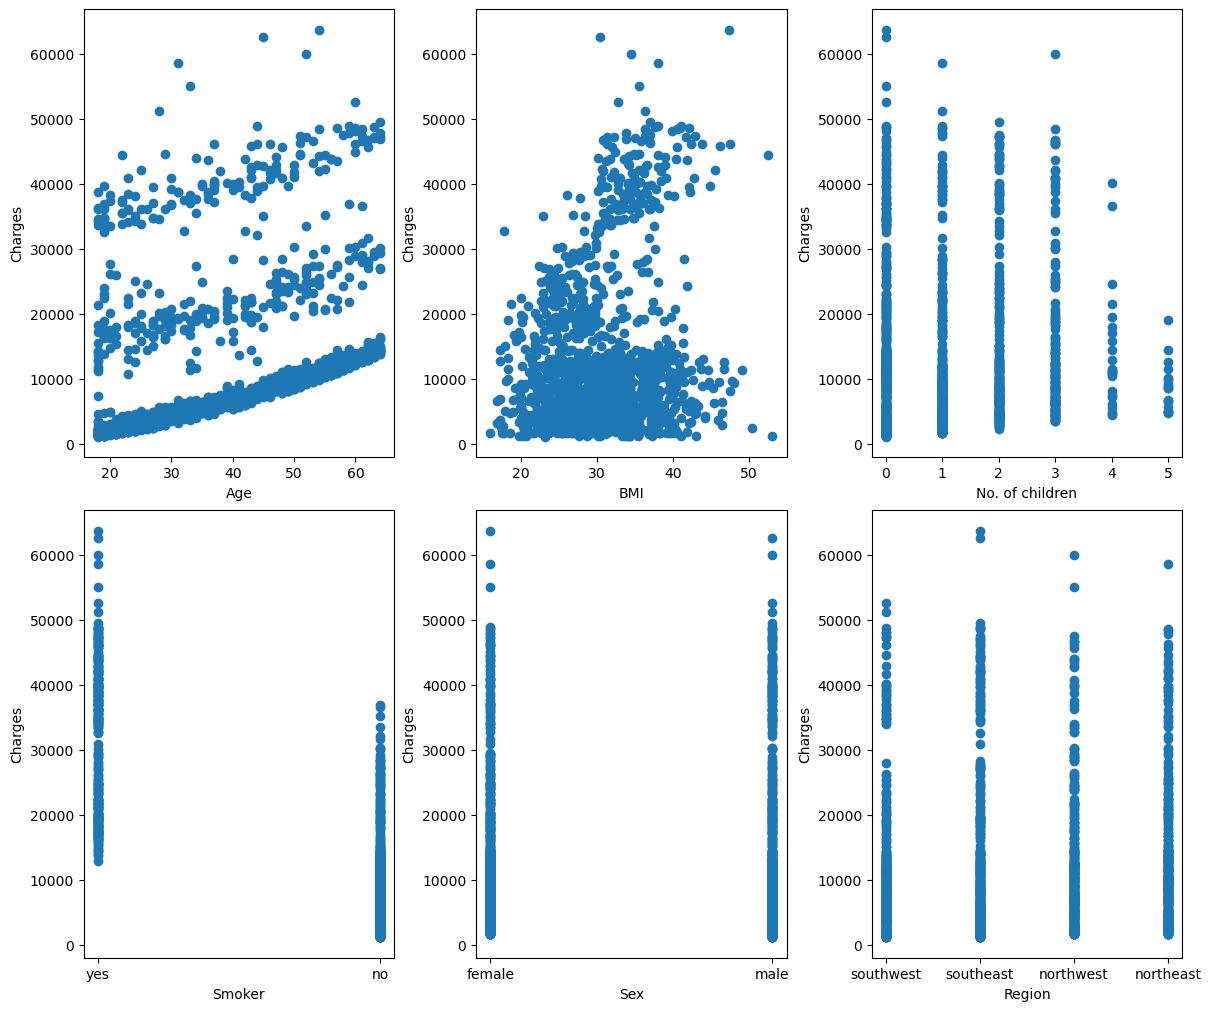

In [22]:
fig = plt.figure(figsize = (12,10), constrained_layout = True)

plt.subplot(2,3,1)
plt.scatter(df['age'], df['charges'])
plt.xlabel("Age")
plt.ylabel("Charges")

plt.subplot(2,3,2)
plt.scatter(df['bmi'], df['charges'])
plt.xlabel("BMI")
plt.ylabel("Charges")

plt.subplot(2,3,3)
plt.scatter(df['children'], df['charges'])
plt.xlabel("No. of children")
plt.ylabel("Charges")

plt.subplot(2,3,4)
plt.scatter(df['smoker'], df['charges'])
plt.xlabel("Smoker")
plt.ylabel("Charges")

plt.subplot(2,3,5)
plt.scatter(df['sex'], df['charges'])
plt.xlabel("Sex")
plt.ylabel("Charges")

plt.subplot(2,3,6)
plt.scatter(df['region'], df['charges'])
plt.xlabel("Region")
plt.ylabel("Charges")
plt.show()

Here we see a clear correlation between insurance charge and the age of clients. As the age of client increases, the insurance cost increases. Also, it obvious that there are 3 distinct classes within the age category. Maybe there is a slight correlation between BMI and charges, however it is not a significant one. At the same time, it is work noticing that most of the overweight/obese individuals do not have high insurnce charges.

Insurance charges are higher for smokers compared to non-smokers. However, insurance charges does not seem to have a correlation with sex and region. But the insurance charges seems to lesser for clients with 5 children. It could be also due to a low population case as well.

Let's try to figure out the 3 distinct class of charges with in the age category.
First let's see if there is a correlation between people who are smokers and not.

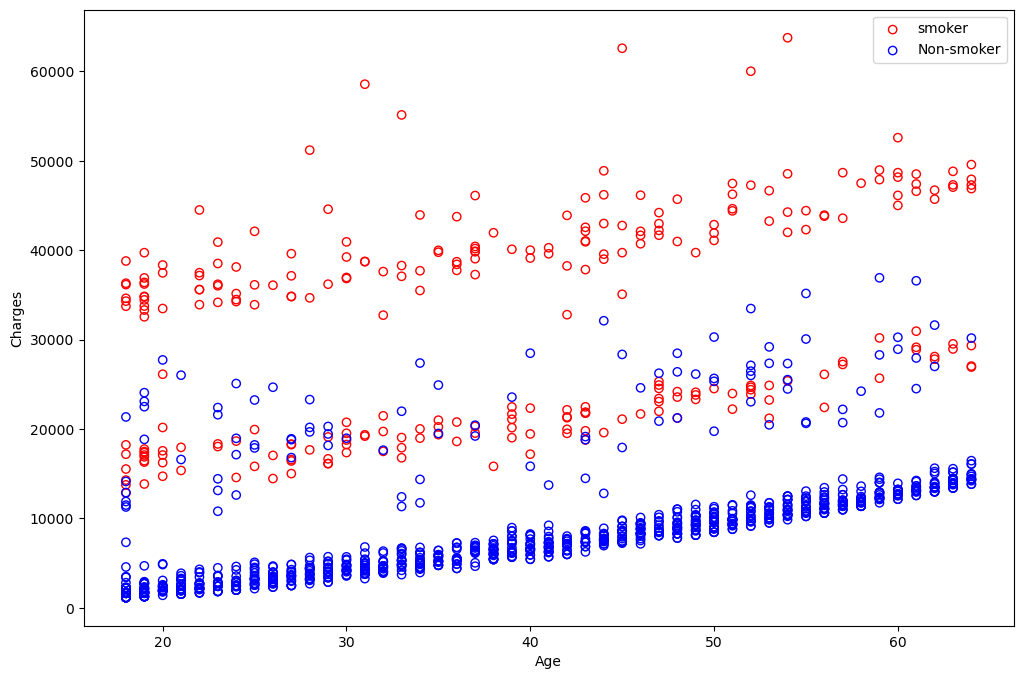

In [23]:
cond1 = df['smoker'] == 'yes'   # smoker
cond2 = df['smoker'] == 'no'    # non-smoker

fig = plt.figure(figsize = (12,8)) 
plt.scatter(df[cond1]['age'], df[cond1]['charges'], label = 'smoker', edgecolors = 'r', facecolors = 'none')
plt.scatter(df[cond2]['age'], df[cond2]['charges'], label = 'Non-smoker', edgecolors = 'b', facecolors = 'none')
plt.xlabel("Age")
plt.ylabel("Charges")
plt.legend()
plt.show()

There is a clear distinction between smokers and non-smokers. Non-smokers have lower insurance cost compared to smokers. However each smoker and non-smokers have distinct 2 class of charges. Let's try to find out the factor causing a split of charges like this? Is it BMI? Let's classify clients with bmi less than 25 and bmi greater than 25.

36910.60803


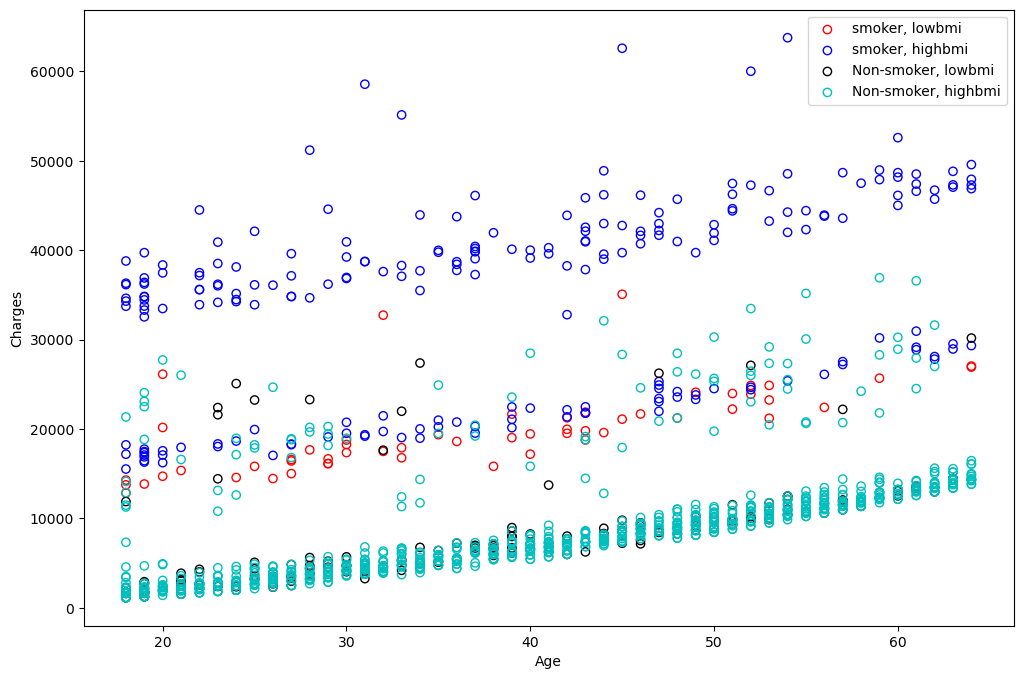

In [24]:
cond3 = df['bmi'] <= 25   # lowbmi
cond4 = df['bmi'] > 25  #highbmi

print(df[cond2 & cond4]['charges'].max())

fig = plt.figure(figsize = (12,8)) 
plt.scatter(df[cond1 & cond3]['age'], df[cond1 & cond3]['charges'], label = 'smoker, lowbmi', edgecolors = 'r', facecolors = 'none')
plt.scatter(df[cond1 & cond4]['age'], df[cond1 & cond4]['charges'], label = 'smoker, highbmi', edgecolors = 'b', facecolors = 'none')

plt.scatter(df[cond2 & cond3]['age'], df[cond2 & cond3]['charges'], label = 'Non-smoker, lowbmi', edgecolors = 'k', facecolors = 'none')
plt.scatter(df[cond2 & cond4]['age'], df[cond2 & cond4]['charges'], label = 'Non-smoker, highbmi', edgecolors = 'c', facecolors = 'none')

plt.xlabel("Age")
plt.ylabel("Charges")
plt.legend()
plt.show()

So BMI based classification does not make any sense. In addition, there are not clients who are smokers with low bmi which is interesting. Let's see if it has to do something with the sex of the individual.

/var/folders/c8/g5hp4hlx7dv6gv7n9zdg74rc0000gn/T/ipykernel_64447/2515681309.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(df[cond1][cond6]['age'], df[cond1][cond6]['charges'], label = 'smoker, female', edgecolors = 'y', facecolors = 'none')
/var/folders/c8/g5hp4hlx7dv6gv7n9zdg74rc0000gn/T/ipykernel_64447/2515681309.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(df[cond1][cond6]['age'], df[cond1][cond6]['charges'], label = 'smoker, female', edgecolors = 'y', facecolors = 'none')


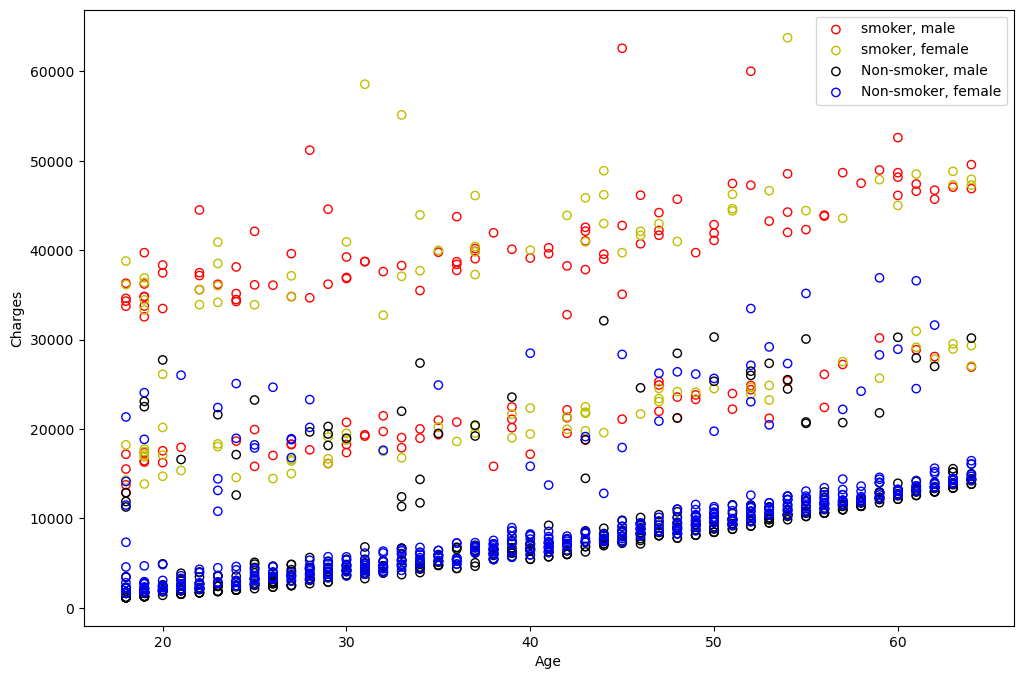

In [25]:
cond5 = df['sex'] == 'male'
cond6 = df['sex'] == 'female'

fig = plt.figure(figsize = (12,8)) 
plt.scatter(df[cond1 & cond5]['age'], df[cond1 & cond5]['charges'], label = 'smoker, male', edgecolors = 'r', facecolors = 'none')
plt.scatter(df[cond1][cond6]['age'], df[cond1][cond6]['charges'], label = 'smoker, female', edgecolors = 'y', facecolors = 'none')

plt.scatter(df[cond2 & cond5]['age'], df[cond2 & cond5]['charges'], label = 'Non-smoker, male', edgecolors = 'k', facecolors = 'none')
plt.scatter(df[cond2 & cond6]['age'], df[cond2 & cond6]['charges'], label = 'Non-smoker, female', edgecolors = 'b', facecolors = 'none')

plt.xlabel("Age")
plt.ylabel("Charges")
plt.legend()
plt.show()

Sex is also not a distinct factor here. Let's taka a look at the non-smokers with insurance charges greater than 10000 and smokers with charges greater than 30000. The upper class in each smoker vs non-smoker category

In [26]:
data1 = df[(df['smoker'] == 'no') & (df['charges'] > 10000)]
data2 = df[(df['smoker'] == 'yes') & (df['charges'] > 30000)]

Let's look at the data1 case:

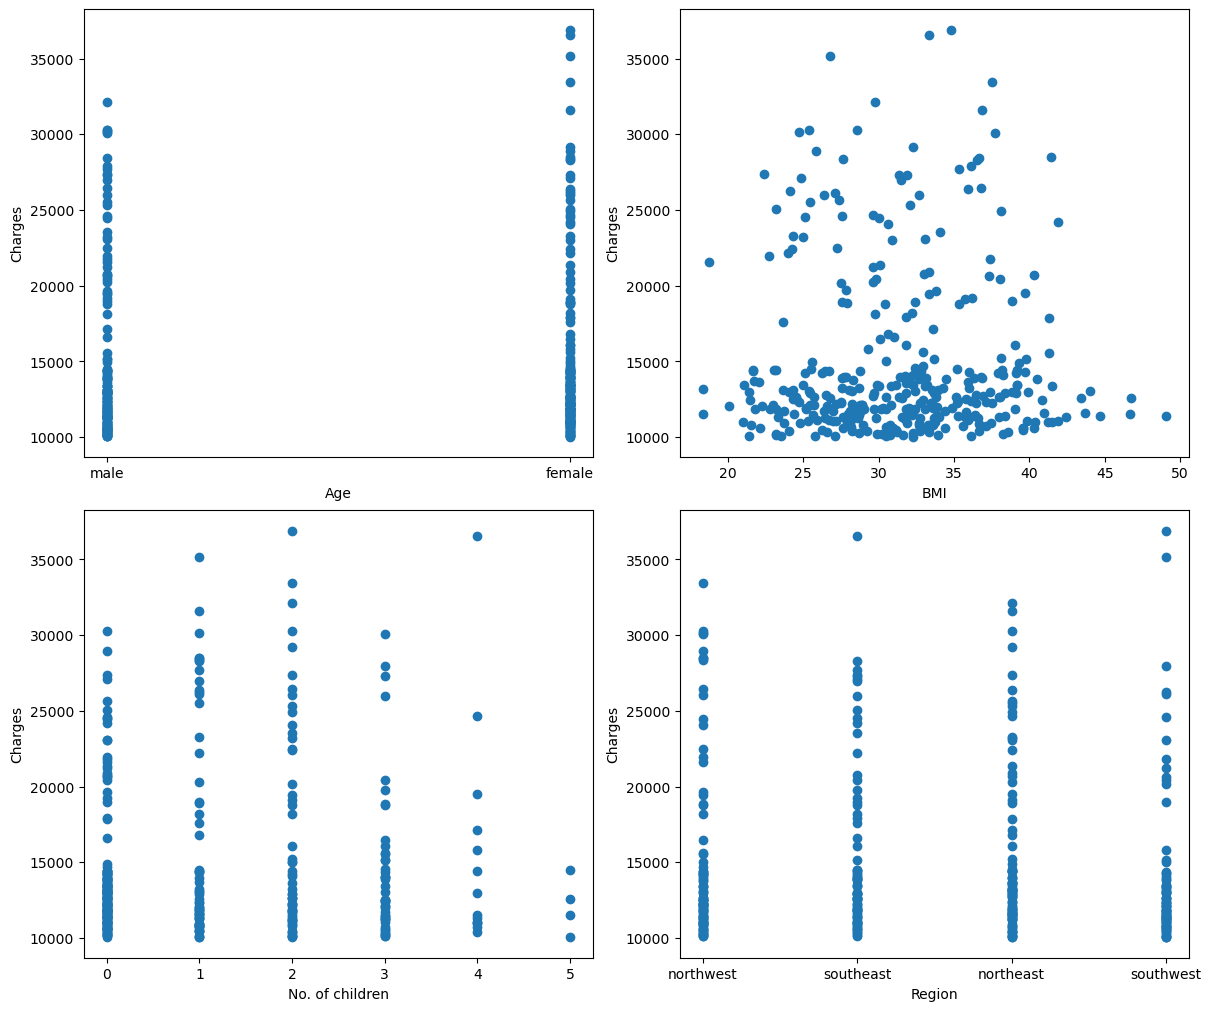

In [27]:
fig = plt.figure(figsize = (12,10), constrained_layout = True)

plt.subplot(2,2,1)
plt.scatter(data1['sex'], data1['charges'])
plt.xlabel("Age")
plt.ylabel("Charges")

plt.subplot(2,2,2)
plt.scatter(data1['bmi'], data1['charges'])
plt.xlabel("BMI")
plt.ylabel("Charges")

plt.subplot(2,2,3)
plt.scatter(data1['children'], data1['charges'])
plt.xlabel("No. of children")
plt.ylabel("Charges")

plt.subplot(2,2,4)
plt.scatter(data1['region'], data1['charges'])
plt.xlabel("Region")
plt.ylabel("Charges")

plt.show()

Now let's look at the data2 case:

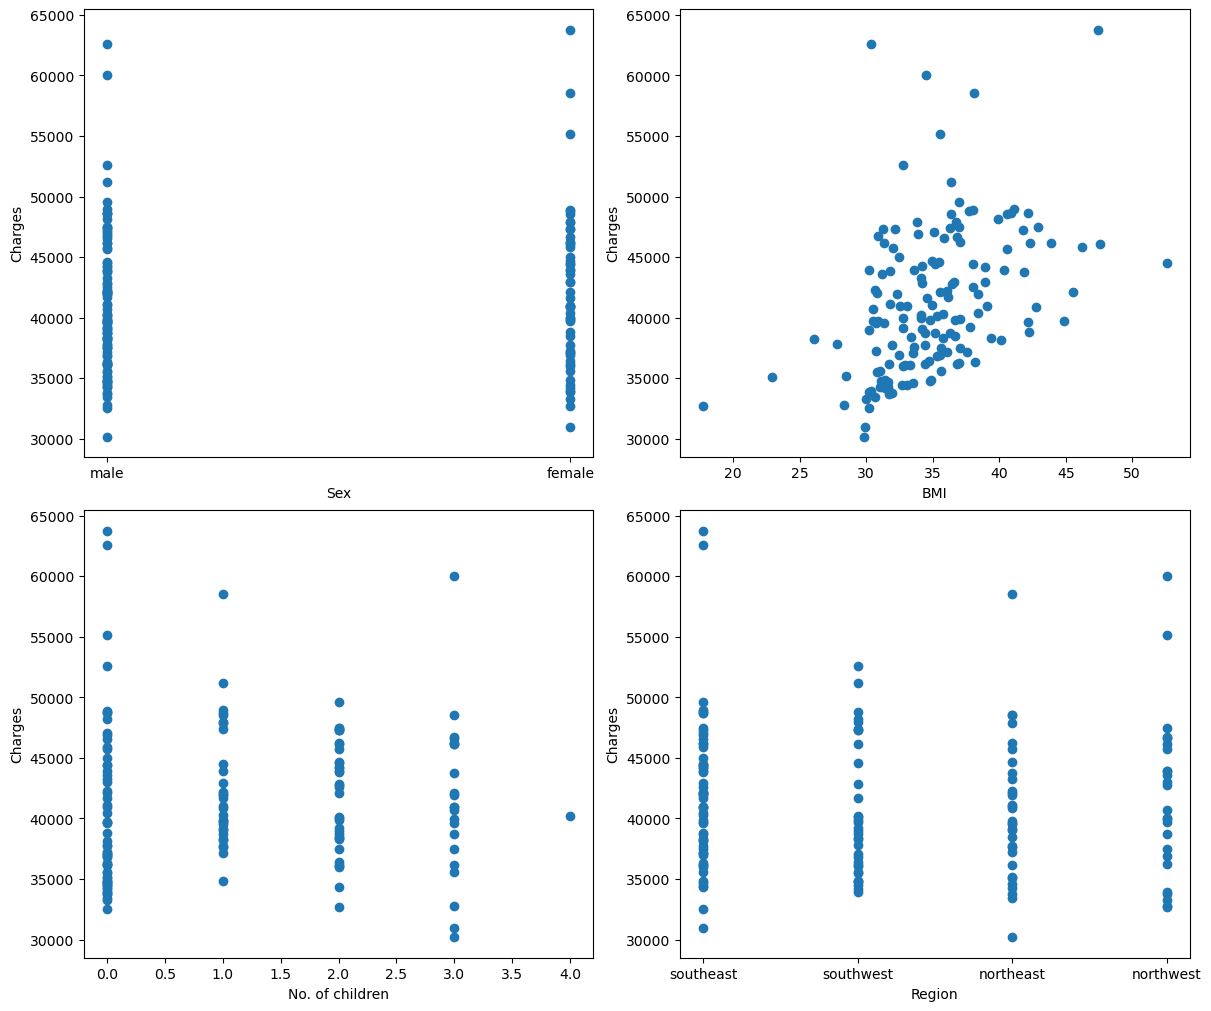

In [28]:
fig = plt.figure(figsize = (12,10), constrained_layout = True)

plt.subplot(2,2,1)
plt.scatter(data2['sex'], data2['charges'])
plt.xlabel("Sex")
plt.ylabel("Charges")

plt.subplot(2,2,2)
plt.scatter(data2['bmi'], data2['charges'])
plt.xlabel("BMI")
plt.ylabel("Charges")

plt.subplot(2,2,3)
plt.scatter(data2['children'], data2['charges'])
plt.xlabel("No. of children")
plt.ylabel("Charges")

plt.subplot(2,2,4)
plt.scatter(data2['region'], data2['charges'])
plt.xlabel("Region")
plt.ylabel("Charges")

plt.show()

In the non-smoker class with high charges, there is smaller correlation between charges and bmi. Interestingly most of the non-smoker with high charges are **obese**. It looks like the 2 distinct class in smoker vs non-smokers could be due to a range of factors.

Let's looks for correlations using the corr() function.

In [29]:
corr_matrix = df.corr(numeric_only=True) #correlation matrix
corr_matrix['charges']  # correlation of parameters with charges

age         0.299008
bmi         0.198341
children    0.067998
charges     1.000000
Name: charges, dtype: float64

The results are similar to what we already observed from the plots. We can directly make scatter matrix plot here.

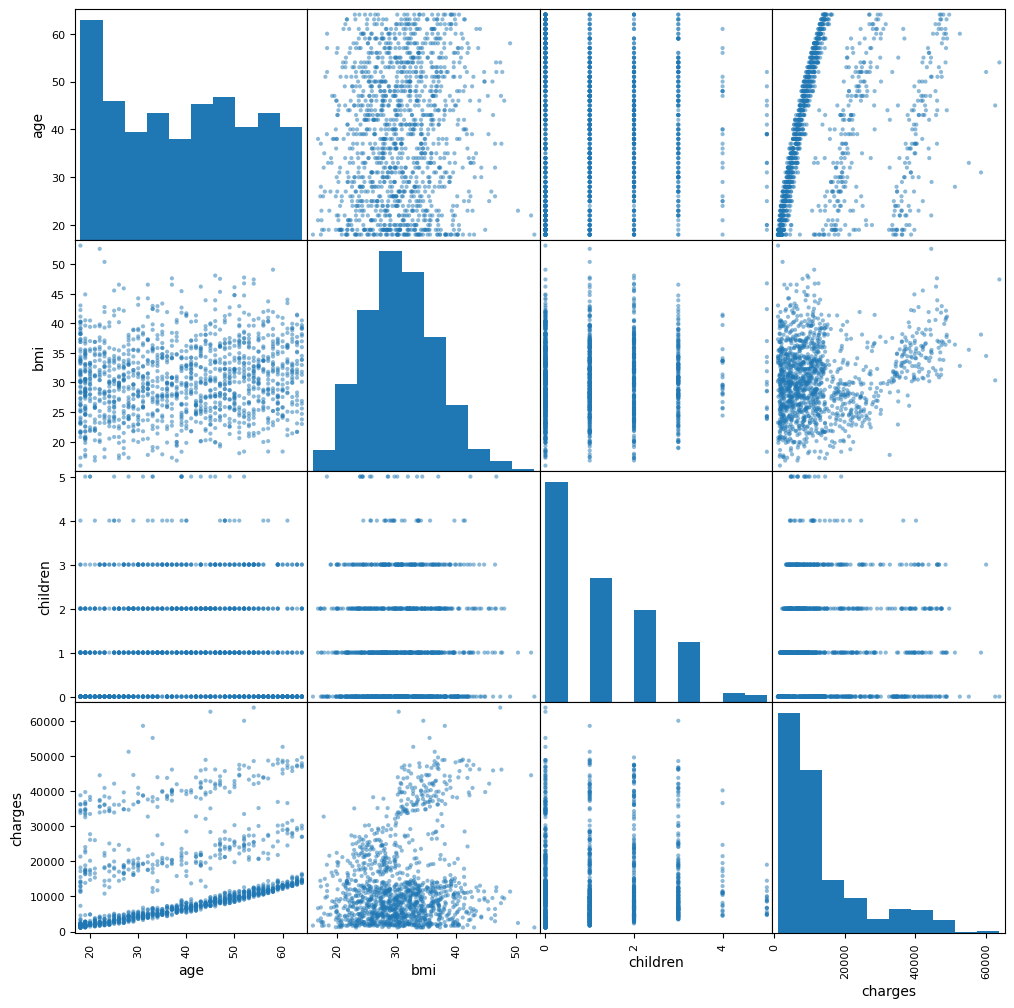

In [30]:
from pandas.plotting import scatter_matrix
#attributes = ["age", "sysBP", "prevalentHyp", "diaBP", "glucose"]
scatter_matrix(df, figsize = (12,12))
plt.show()

## Data preprocessing - cleaning, hot encoding and scaling
***Now let's build a multivariate linear regression model to predict the insurace charges.*** Before building we need to clean the data and split it into training and test datasets. Let's do that.

In [31]:
# Check for null/NAN values in dataset
df.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [32]:
# check for duplicate values
dup = df[df.duplicated()]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
dup

Duplicate Rows :


age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631

In [33]:
# drop the duplicate rows
df = df.drop_duplicates()

In this dataset, we don't have any null values, so cleaning is not requried. But we have 3 categorical variables and most of the ML algorithms cannot feed cateogorical variables. We will use a technique called *one-hot encoding* to create a binary attribute for each category.

In [34]:
# let's use pandas get_dummies function to do the one-hot encoding
cat_variables = ['sex', 'smoker', 'region']
df_cod = pd.get_dummies(data = df,
                         prefix = cat_variables,
                         columns = cat_variables, dtype=int)

In [35]:
df_cod.info()
df_cod.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1337 non-null   int64  
 1   bmi               1337 non-null   float64
 2   children          1337 non-null   int64  
 3   charges           1337 non-null   float64
 4   sex_female        1337 non-null   int64  
 5   sex_male          1337 non-null   int64  
 6   smoker_no         1337 non-null   int64  
 7   smoker_yes        1337 non-null   int64  
 8   region_northeast  1337 non-null   int64  
 9   region_northwest  1337 non-null   int64  
 10  region_southeast  1337 non-null   int64  
 11  region_southwest  1337 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 135.8 KB


age     bmi  children      charges  sex_female  sex_male  smoker_no  \
0   19  27.900         0  16884.92400           1         0          0   
1   18  33.770         1   1725.55230           0         1          1   
2   28  33.000         3   4449.46200           0         1          1   
3   33  22.705         0  21984.47061           0         1          1   
4   32  28.880         0   3866.85520           0         1          1   

   smoker_yes  region_northeast  region_northwest  region_southeast  \
0           1                 0                 0                 0   
1           0                 0                 0                 1   
2           0                 0                 0                 1   
3           0                 0                 1                 0   
4           0                 0                 1                 0   

   region_southwest  
0                 1  
1                 0  
2                 0  
3                 0  
4                 0

Now all the categorical values have been one hot encoded. Let's split the data into train, test and cross validatation dataset

In [36]:
from sklearn.model_selection import train_test_split

# Split into train and test first
data_train, data_test = train_test_split(df_cod, test_size = 0.4, random_state=42) # set random_state for reproducability
# Split the test into test and validate again
data_test, data_val = train_test_split(data_test, test_size = 0.5, random_state=42)
print(f" Train data shape : {data_train.shape}, Test data shape : {data_test.shape}, Validation data shape: {data_val.shape}")  

 Train data shape : (802, 12), Test data shape : (267, 12), Validation data shape: (268, 12)


Let's extract the X and Y datasets from each of these cateogories:

In [37]:
y_train = data_train['charges']
x_train = data_train.drop('charges', axis = 1)
print(x_train.head())

y_test = data_test['charges']
x_test = data_test.drop('charges', axis = 1)
print(x_test.head())

y_val = data_val['charges']
x_val = data_val.drop('charges', axis = 1)
print(y_val)
print(x_val.head())

     age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
25    59  27.720         3           1         0          1           0   
336   60  25.740         0           0         1          1           0   
47    28  34.770         0           1         0          1           0   
106   19  28.400         1           1         0          1           0   
994   27  20.045         3           1         0          0           1   

     region_northeast  region_northwest  region_southeast  region_southwest  
25                  0                 0                 1                 0  
336                 0                 0                 1                 0  
47                  0                 1                 0                 0  
106                 0                 0                 0                 1  
994                 0                 1                 0                 0  
      age    bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
1240  

Before modelling the data, we need to do scale all the features to get accurate results. This is to avoid biasing towards features with large range of values.

In [38]:
# standardization or z-score normalization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_norm = scaler.fit_transform(x_train) # Returns a numpy array and not a pandas df after normalization

print(f"Age min and max before normalization: {x_train['age'].min(), x_train['age'].max()}")
print(f"Age min and max after normalization: {x_train_norm[:,0].min(), x_train_norm[:, 0].max()}")

# similarly for validation and test dataset
x_val_norm = scaler.fit_transform(x_val)
x_test_norm = scaler.fit_transform(x_test)

Age min and max before normalization: (18, 64)
Age min and max after normalization: (-1.5137167128294682, 1.7729666471672798)


## ML modelling

### Linear Regression

Let's try to do a multivariate regression modelling for the data. For this we we will use a multivariate linear model

The model's prediction with multiple variables is given by the linear model:

$$ f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0 + w_1x_1 +... + w_{n-1}x_{n-1} + b \tag{1}$$
or in vector notation:
$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b  \tag{2} $$ 
where $\cdot$ is a vector `dot product`

where
$$ x_0, x_1 ....., x_n $$ are feature vectors and $$ w_0, ..... w_b, b$$ are weight and bias parameters.

In order to conduct multivariate modelling, we use the SGDRegressor module from the scikit learn.

In [39]:
# Let's use the stochastic gradient descent regressor from Scikit Learn

from sklearn.linear_model import SGDRegressor

sgdr = SGDRegressor(max_iter=1000, alpha = 0.001) # setting the maximum iteration and regularization paramter for l2 penality
#sgdr = LinearRegression()
sgdr.fit(x_train_norm, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor(alpha=0.001)
number of iterations completed: 14, number of weight updates: 11229.0


In [40]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")

model parameters:                   w: [ 3564.73276528  1982.39328734   518.86758396    32.14937893
   -32.14937893 -4591.63677471  4591.63677471   292.33855625
   -60.40237412  -150.52103001   -70.14917312], b:[13036.88056322]


Now let's predict the results on training dataset using this model we developed and how it deviates from the actual insurance charges:

In [41]:
ypred_train_lsgd = sgdr.predict(x_train_norm) # predicted charges for train
ypred_val_lsgd = sgdr.predict(x_val_norm) # predicted charges for validation
ypred_test_lsgd = sgdr.predict(x_test_norm) # predicted charges for test

# calculated value using equation 2
y_calc_train = np.dot(x_train_norm, w_norm) + b_norm


Results from sgdr.predict and np.dot are the same. But some of these predicted insurance charges are negative which is indication of a poor model.

Now let's plot the actual charges and predicted charges for the test data to understand how good the model is.

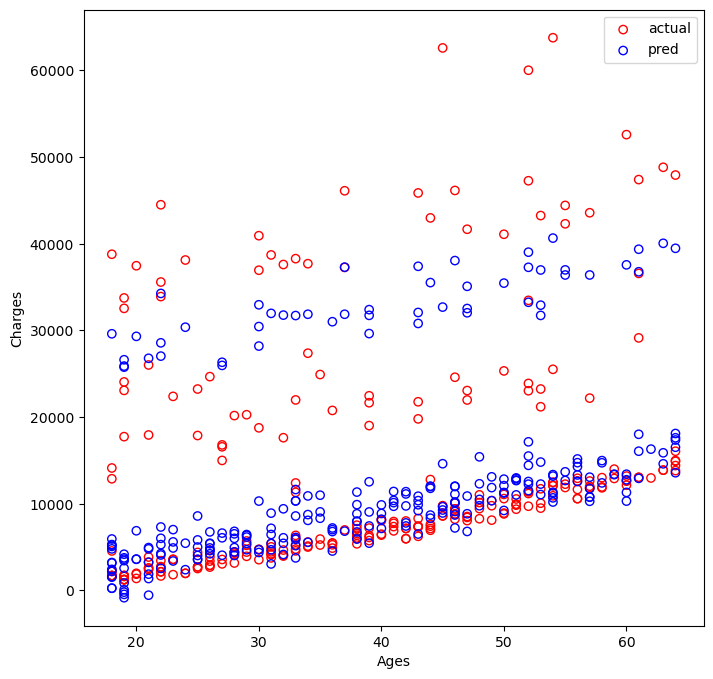

In [42]:
fig = plt.figure(figsize = (8,8))
plt.scatter(x_test['age'], y_test, label = 'actual', edgecolors = 'red', facecolors = 'none')
plt.scatter(x_test['age'], ypred_test_lsgd, label = 'pred', edgecolors = 'blue', facecolors = 'none')
plt.xlabel('Ages')
plt.ylabel("Charges")
#plt.ylim(0,10000)
plt.legend()
plt.show()

It looks like the model is high bias/underfit as the predicted values are very different from the actual training set values. Let's calculate the root mean square error and R-squared values. 

The root mean squared error (RMSE) basically calculates the square root of the mean of the  squared residuals of samples. Also, we can calculate the R^2 value or coefficient of determination which would basically explain how much percentage of variance in the dependent (target variable) is explained by the independent variables (features). 

The coefficient of determination (R2) = 1 - (SSR/TSR) where SSR = sum of squares of residuals and TSS = total sum of squares. An R2 value of 1 indicates good prediction and 0 indicated a poor model ( Y independent of X).

In [43]:
from sklearn.metrics import mean_squared_error

#metrics for train data
rmse_lsgd_train = np.sqrt(mean_squared_error(y_train, ypred_train_lsgd))
R2_lsgd_train = sgdr.score(x_train_norm, y_train)

# metrics for validation data 
rmse_lsgd_val = np.sqrt(mean_squared_error(y_val, ypred_val_lsgd))
R2_lsgd_val = sgdr.score(x_val_norm, y_val)

# metrics for test data 
rmse_lsgd_test = np.sqrt(mean_squared_error(y_test, ypred_test_lsgd))
R2_lsgd_test = sgdr.score(x_test_norm, y_test)

print("Training:")
print(f" The root mean squared error: {rmse_lsgd_train}")
print(f" R2 value: {R2_lsgd_train}")

print("Validataion:")
print(f" The root mean squared error: {rmse_lsgd_val}")
print(f" R2 value: {R2_lsgd_val}")

print("Testing:")
print(f" The root mean squared error: {rmse_lsgd_test}")
print(f" R2 value: {R2_lsgd_test}")

Training:
 The root mean squared error: 5947.812971301977
 R2 value: 0.7357312239781457
Validataion:
 The root mean squared error: 5471.111517005788
 R2 value: 0.8110660195811252
Testing:
 The root mean squared error: 6838.290219396225
 R2 value: 0.7285834903187071


The results from the simple regression model are not bad. RMSE and R2 values of test and validation datasets looks reasonable compared to  the training scores. 

In some training examples, the the model does a good job. Let's try to add some polynomial features to see if the model does a better job. Let's make some more complex model.

### Mulitvariate polyonomial regression

In [44]:
# Let's add some polynomial features
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 3, include_bias=False) # using degree 3 polynomial features
x_train_mapped = poly.fit_transform(x_train)
x_train_mapped_norm = scaler.fit_transform(x_train_mapped)

x_val_mapped = poly.fit_transform(x_val)
x_val_mapped_norm = scaler.fit_transform(x_val_mapped)

x_test_mapped = poly.fit_transform(x_test)
x_test_mapped_norm = scaler.fit_transform(x_test_mapped)

print(x_train_mapped_norm.shape)

(802, 363)


We have 363 features instead of 11 features. Let's see how the model performs.

In [45]:
sgdr_poly = SGDRegressor(max_iter=1000, alpha = 0.1) # setting the maximum iteration and regularization parameter
sgdr_poly.fit(x_train_mapped_norm, y_train)
print(sgdr_poly)
print(f"number of iterations completed: {sgdr_poly.n_iter_}, number of weight updates: {sgdr_poly.t_}")

# Fitted parameters
b_norm_poly = sgdr_poly.intercept_
w_norm_poly = sgdr_poly.coef_
#print(f"model parameters:   w: {w_norm_poly}, b:{b_norm_poly}")

# predicted charges 
ypred_train_psgd = sgdr_poly.predict(x_train_mapped_norm) # predicted charges from the model
ypred_val_psgd = sgdr_poly.predict(x_val_mapped_norm) 
ypred_test_psgd = sgdr_poly.predict(x_test_mapped_norm) 

SGDRegressor(alpha=0.1)
number of iterations completed: 23, number of weight updates: 18447.0


In [46]:
#metrics for train data
rmse_psgd_train = np.sqrt(mean_squared_error(y_train, ypred_train_psgd))
R2_psgd_train = sgdr_poly.score(x_train_mapped_norm, y_train)

# metrics for validation data 
rmse_psgd_val = np.sqrt(mean_squared_error(y_val, ypred_val_psgd))
R2_psgd_val = sgdr_poly.score(x_val_mapped_norm, y_val)

# metrics for test data 
rmse_psgd_test = np.sqrt(mean_squared_error(y_test, ypred_test_psgd))
R2_psgd_test = sgdr_poly.score(x_test_mapped_norm, y_test)

print("Training:")
print(f" The root mean squared error: {rmse_psgd_train}")
print(f" R2 value: {R2_psgd_train}")

print("Validataion:")
print(f" The root mean squared error: {rmse_psgd_val}")
print(f" R2 value: {R2_psgd_val}")

print("Testing:")
print(f" The root mean squared error: {rmse_psgd_test}")
print(f" R2 value: {R2_psgd_test}")

Training:
 The root mean squared error: 4812.5796483243585
 R2 value: 0.8269836657774282
Validataion:
 The root mean squared error: 4804.833027288717
 R2 value: 0.8542812153470754
Testing:
 The root mean squared error: 5997.253251013402
 R2 value: 0.7912406281123071


The RMSE and R2 values from the train, validation and test data using the polynomial model looks better than the corresponding values from the simple linear regression model.

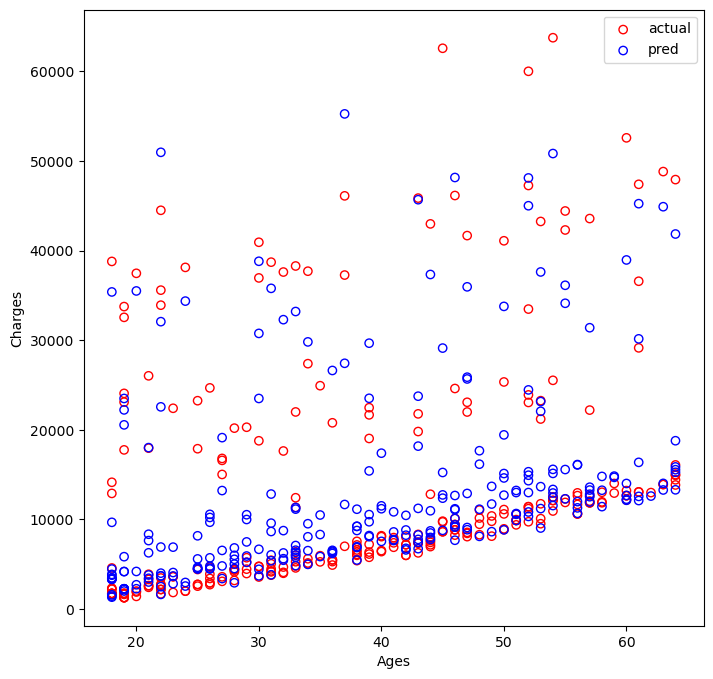

In [47]:
fig = plt.figure(figsize = (8,8))
plt.scatter(x_test['age'], y_test, label = 'actual', edgecolors = 'red', facecolors = 'none')
plt.scatter(x_test['age'], ypred_test_psgd, label = 'pred', edgecolors = 'blue', facecolors = 'none')
plt.xlabel('Ages')
plt.ylabel("Charges")
#plt.ylim(0,10000)
plt.legend()
plt.show()

The polynomial model does a better job in the estimation of insurance charges compared to the linear model. The actual values and prediction values are close to each other for the test data even though they are not overlying. Even though this is a good model, it still require some more development to do a better job on the prediction.

### Support Vector Regression (SVR)
Here we will use the widely use the SVR model for the insurance prediction. In the case of support vector regression, the model basically tries to fit a hyperplane to fit the data. Ideally we want all the data points inside a eta-insensitive tube surround the hyperplane with a radius eta. Or basically tries to find a function outputing values not deviating more than 'eta' from the actual values. The errors of  points inside the tube will be disregarded and points outside the tube will be penalized in this process. The points outside the tube are called support vectors in this case. 

One advantages of SVR, is that it can handle non-linear data pretty well. This is because SVR allows to fit a hyperpane in the higher dimensional feature space (through kernel trick) using the base features. Let's try the SVR for our prediction case now.

Here C is the regularization paramter (scales as 1/lamda). Higher the C, lower the reqularization and vice versa. Epsilon specifies the epsilon-tube radius within which no penalty is associated in the training loss function with points predicted within a distance epsilon from the actual value.

In [48]:
from sklearn.svm import SVR

# Initiating the SVR
svr = SVR(kernel='linear', C=100, epsilon=0.1)

#fitting the data
svr.fit(x_train_norm, y_train)

SVR(C=100, kernel='linear')

In [49]:
# predicted charges 
ypred_train_svr = svr.predict(x_train_norm) # predicted charges from the model
ypred_val_svr = svr.predict(x_val_norm) 
ypred_test_svr = svr.predict(x_test_norm) 

#metrics for train data
rmse_svr_train = np.sqrt(mean_squared_error(y_train, ypred_train_svr))
R2_svr_train = svr.score(x_train_norm, y_train)

# metrics for validation data 
rmse_svr_val = np.sqrt(mean_squared_error(y_val, ypred_val_svr))
R2_svr_val = svr.score(x_val_norm, y_val)

# metrics for test data 
rmse_svr_test = np.sqrt(mean_squared_error(y_test, ypred_test_svr))
R2_svr_test = svr.score(x_test_norm, y_test)

print("Training:")
print(f" The root mean squared error: {rmse_svr_train}")
print(f" R2 value: {R2_svr_train}")

print("Validataion:")
print(f" The root mean squared error: {rmse_svr_val}")
print(f" R2 value: {R2_svr_val}")

print("Testing:")
print(f" The root mean squared error: {rmse_svr_test}")
print(f" R2 value: {R2_svr_test}")

Training:
 The root mean squared error: 7244.46915483861
 R2 value: 0.6079473613581137
Validataion:
 The root mean squared error: 7585.297876628681
 R2 value: 0.6368348042660665
Testing:
 The root mean squared error: 8743.19774423167
 R2 value: 0.5563077875142073


The RMSE and R2 score for testing is lesser for SVR compared to polynomial regression. Upon trying linear kernel,  polynomial filter kernels with degrees upto 4, radial basis function kernel and sigmoid kernel, the linear kernel seems to be producing the best RMSE and R2 score.

### Decision Tree (DT) Regressor
Now let's try a DT regressor for this problem. In the case of DT, the splitting of feature will be using thresholds which will maximize the reduction of the variance. i.e., the difference (variance of root node - (left fraction * variance of left split + right fraction * variance of right split). The "squared_error” for the mean squared error, which is equal to variance reduction as feature selection criterion and minimizes the L2 loss using the mean of each terminal node

In [61]:
from sklearn.tree import DecisionTreeRegressor,export_graphviz

# DT regressor
dt = DecisionTreeRegressor(criterion='squared_error', max_depth=5, random_state=42)
dt.fit(x_train_norm, y_train)

# tree visualization
# Getting a list of the feature names
feat_names = list(x_train.columns)

# using export_graphviz() for writing down the tree into a dot format
export_graphviz(
            dt,
out_file="dt.dot",
feature_names=feat_names,
rounded=True,
filled=True,
impurity=True
)

Let's take a look at the DT from fitting on the training data.
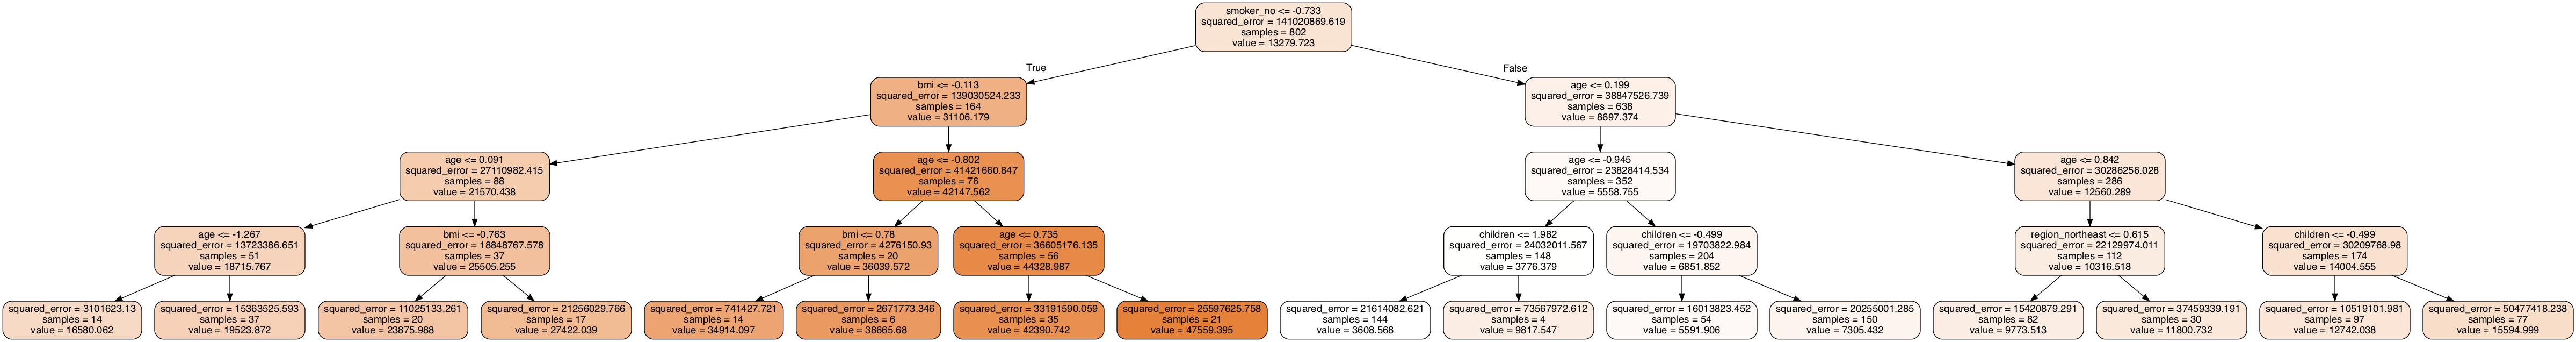
Now let's test the RMSE and R2 scores on all the datasets.

In [62]:
# predicted charges 
ypred_train_dt = dt.predict(x_train_norm) # predicted charges from the model
ypred_val_dt = dt.predict(x_val_norm) 
ypred_test_dt = dt.predict(x_test_norm) 

#metrics for train data
rmse_dt_train = np.sqrt(mean_squared_error(y_train, ypred_train_dt))
R2_dt_train = dt.score(x_train_norm, y_train)

# metrics for validation data 
rmse_dt_val = np.sqrt(mean_squared_error(y_val, ypred_val_dt))
R2_dt_val = dt.score(x_val_norm, y_val)

# metrics for test data 
rmse_dt_test = np.sqrt(mean_squared_error(y_test, ypred_test_dt))
R2_dt_test = dt.score(x_test_norm, y_test)

print("Training:")
print(f" The root mean squared error: {rmse_dt_train}")
print(f" R2 value: {R2_dt_train}")

print("Validation:")
print(f" The root mean squared error: {rmse_dt_val}")
print(f" R2 value: {R2_dt_val}")

print("Testing:")
print(f" The root mean squared error: {rmse_dt_test}")
print(f" R2 value: {R2_dt_test}")

Training:
 The root mean squared error: 4044.6917764087475
 R2 value: 0.8777913040477071
Validation:
 The root mean squared error: 3894.0439367489207
 R2 value: 0.9042892686106055
Testing:
 The root mean squared error: 5805.334129405968
 R2 value: 0.8043879312342002


The metrics of have improved for the DT regression compared to polynomial regression. Before we move on, let's try the DT on the feature engineered dataset with polynomial features as well.

In [70]:
# DT regressor for feature engineered dataset
dtp = DecisionTreeRegressor(criterion='squared_error', max_depth=5, random_state=42)
dtp.fit(x_train_mapped_norm, y_train)


# predicted charges 
ypred_train_dtp = dtp.predict(x_train_mapped_norm) # predicted charges from the model
ypred_val_dtp = dtp.predict(x_val_mapped_norm) 
ypred_test_dtp = dtp.predict(x_test_mapped_norm) 

#metrics for train data
rmse_dtp_train = np.sqrt(mean_squared_error(y_train, ypred_train_dtp))
R2_dtp_train = dtp.score(x_train_mapped_norm, y_train)

# metrics for validation data 
rmse_dtp_val = np.sqrt(mean_squared_error(y_val, ypred_val_dtp))
R2_dtp_val = dtp.score(x_val_mapped_norm, y_val)

# metrics for test data 
rmse_dtp_test = np.sqrt(mean_squared_error(y_test, ypred_test_dtp))
R2_dtp_test = dtp.score(x_test_mapped_norm, y_test)

print("Training:")
print(f" The root mean squared error: {rmse_dtp_train}")
print(f" R2 value: {R2_dtp_train}")

print("Validation:")
print(f" The root mean squared error: {rmse_dtp_val}")
print(f" R2 value: {R2_dtp_val}")

print("Testing:")
print(f" The root mean squared error: {rmse_dtp_test}")
print(f" R2 value: {R2_dtp_test}")

Training:
 The root mean squared error: 3900.0759304604458
 R2 value: 0.8863740909908884
Validation:
 The root mean squared error: 5103.833499237489
 R2 value: 0.8355810250243827
Testing:
 The root mean squared error: 6818.903642370411
 R2 value: 0.7301202424128873


DT seems to be giving good results on the original dataset rather than the feature engineered dataset with polynomial features.

### Random Forest (RF) Regression
The RF regression will use an ensemble of trees rather than a single DT. During the feature split, rather than using all the features, RF will use a subset of features and select the best feature among the subset for splitting the samples. Let's see how random forest performs for this regression task.

In [63]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=128, criterion='squared_error', max_depth=5, max_features='sqrt', max_samples=500)
rf.fit(x_train_norm, y_train)

RandomForestRegressor(max_depth=5, max_features='sqrt', max_samples=500,
                      n_estimators=128)

In [64]:
# predicted charges 
ypred_train_rf = rf.predict(x_train_norm) # predicted charges from the model
ypred_val_rf = rf.predict(x_val_norm) 
ypred_test_rf = rf.predict(x_test_norm) 

#metrics for train data
rmse_rf_train = np.sqrt(mean_squared_error(y_train, ypred_train_rf))
R2_rf_train = rf.score(x_train_norm, y_train)

# metrics for validation data 
rmse_rf_val = np.sqrt(mean_squared_error(y_val, ypred_val_rf))
R2_rf_val = rf.score(x_val_norm, y_val)

# metrics for test data 
rmse_rf_test = np.sqrt(mean_squared_error(y_test, ypred_test_rf))
R2_rf_test = rf.score(x_test_norm, y_test)

print("Training:")
print(f" The root mean squared error: {rmse_rf_train}")
print(f" R2 value: {R2_rf_train}")

print("Validation:")
print(f" The root mean squared error: {rmse_rf_val}")
print(f" R2 value: {R2_rf_val}")

print("Testing:")
print(f" The root mean squared error: {rmse_rf_test}")
print(f" R2 value: {R2_rf_test}")

Training:
 The root mean squared error: 4435.535582038425
 R2 value: 0.8530317980587319
Validation:
 The root mean squared error: 4585.050371068288
 R2 value: 0.8673072598427082
Testing:
 The root mean squared error: 6120.891360705613
 R2 value: 0.7825444246601169


The RF, R2 and RMSE has gone down below the metrics from the single DT. Let's try the random forest on the dataset feature engineered with polynomial features. This is interesting.

In [65]:
# random forest trained with feature engineered polyonomial features
rfp = RandomForestRegressor(n_estimators=128, criterion='squared_error', max_depth=5, max_features='sqrt', max_samples=500)
rfp.fit(x_train_mapped_norm, y_train)

RandomForestRegressor(max_depth=5, max_features='sqrt', max_samples=500,
                      n_estimators=128)

In [66]:
# predicted charges 
ypred_train_rfp = rfp.predict(x_train_mapped_norm) # predicted charges from the model
ypred_val_rfp = rfp.predict(x_val_mapped_norm) 
ypred_test_rfp = rfp.predict(x_test_mapped_norm) 

#metrics for train data
rmse_rfp_train = np.sqrt(mean_squared_error(y_train, ypred_train_rfp))
R2_rfp_train = rfp.score(x_train_mapped_norm, y_train)

# metrics for validation data 
rmse_rfp_val = np.sqrt(mean_squared_error(y_val, ypred_val_rfp))
R2_rfp_val = rfp.score(x_val_mapped_norm, y_val)

# metrics for test data 
rmse_rfp_test = np.sqrt(mean_squared_error(y_test, ypred_test_rfp))
R2_rfp_test = rfp.score(x_test_mapped_norm, y_test)

print("Training:")
print(f" The root mean squared error: {rmse_rf_train}")
print(f" R2 value: {R2_rfp_train}")

print("Validation:")
print(f" The root mean squared error: {rmse_rf_val}")
print(f" R2 value: {R2_rfp_val}")

print("Testing:")
print(f" The root mean squared error: {rmse_rf_test}")
print(f" R2 value: {R2_rfp_test}")

Training:
 The root mean squared error: 4435.535582038425
 R2 value: 0.8831464862006457
Validation:
 The root mean squared error: 4585.050371068288
 R2 value: 0.8927852086459744
Testing:
 The root mean squared error: 6120.891360705613
 R2 value: 0.8035219129450712


The metrics on RF model trained on data with polynomial features are slightly better than the original data. However, the differences are not remarkable. The results are more similar to the DT model. Now let's see the how the plots of insurance charges wrt age looks now with second RF model.

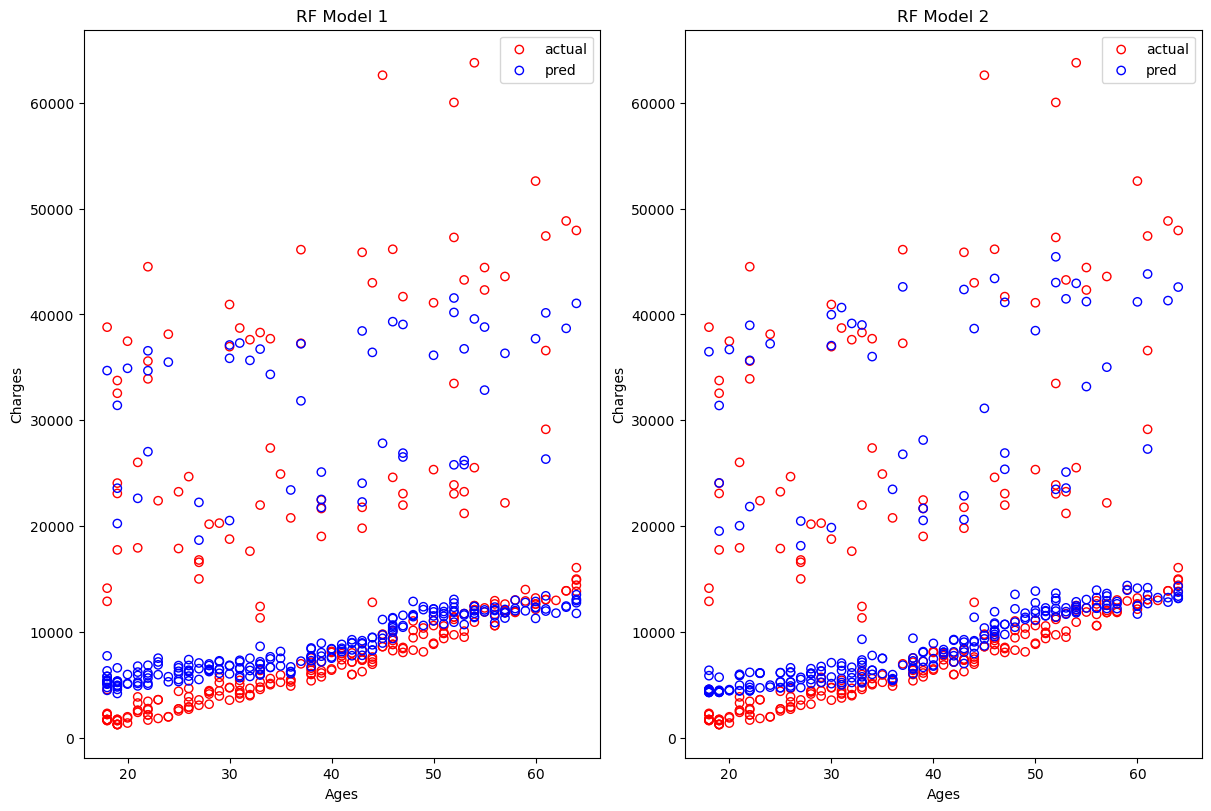

In [67]:
fig, axs = plt.subplots(1,2, figsize = (12,8), constrained_layout=True)
axs[0].scatter(x_test['age'], y_test, label = 'actual', edgecolors = 'red', facecolors = 'none')
axs[0].scatter(x_test['age'], ypred_test_rf, label = 'pred', edgecolors = 'blue', facecolors = 'none')
axs[0].set_xlabel('Ages')
axs[0].set_ylabel("Charges")
axs[0].set_title("RF Model 1")
#plt.ylim(0,10000)
axs[0].legend()

axs[1].scatter(x_test['age'], y_test, label = 'actual', edgecolors = 'red', facecolors = 'none')
axs[1].scatter(x_test['age'], ypred_test_rfp, label = 'pred', edgecolors = 'blue', facecolors = 'none')
axs[1].set_xlabel('Ages')
axs[1].set_ylabel("Charges")
axs[1].set_title("RF Model 2")
#plt.ylim(0,10000)
axs[1].legend()
plt.show()

In both of these models, even though the predictions becomes closer for the scattered points at the top, the blue and red points kind diverge for the lowest insurance charges below 10000. At the same time, polynomial models do a a better job in predicting insurance cost below 10000.

### XGBoost Regression
Let's try the XGBoost regression which is a powerful and efficient implementation of gradient boosting for regression and classification tasks. As the name sounds, this is an extreme version of the gradient boosting, with with advanced engineering techniques to enhance performance and efficiency. The idea is to use several weak learners to form a strong learner. Each tree learns from the mistakes of the previous tree in a sequential manner. The algorithm starts with an initial prediction, then boosted trees will fit on the residuals(mistake of the previous tree) and this process goes on untill the maximum number of trees are reached or residuals becomes smaller than the threshold. The total prediction would be sum of initial prediciton and scaled contribution from rest of the trees. 

Advantages of xgboost over a normal gradient boost includes 
1. Fast and efficient implemnetaion: Parallel tree construction, Out-of-core computation to handle large datasets, Cache awareness (optimized data structures)
2. Regularization to prevent overfitting and generalization
3. Tree Pruning: Rather than pre-pruning with a fixed depth, it grows the complete tree and prune branches backwards (from the leaves) which don't improve performance.
4. Handles missing data
5. Uses first and second order gradient descent for accurate optimization.
6. weighted quantile sketch to better split the data, handle sparse data, Inbuilt cross validatation and better hyperparameter tuning.

We will utilize the xgboost library for this purpose and see how it performs. Since the RF performs better on the feature engineered dataset, let's use the same for the xgboost regression as well.

In [68]:
from xgboost import XGBRegressor

# learning rate = scaled contribution of residuals from each tree.
xgb = XGBRegressor(n_estimators=128, max_depth=4, objective='reg:squarederror', learning_rate=0.1, eval_metric=mean_squared_error)
xgb.fit(x_train_mapped_norm, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False,
             eval_metric=<function mean_squared_error at 0x7fa158fc4550>,
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=128,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [69]:
# predicted charges 
ypred_train_xgb = xgb.predict(x_train_mapped_norm) # predicted charges from the model
ypred_val_xgb = xgb.predict(x_val_mapped_norm) 
ypred_test_xgb = xgb.predict(x_test_mapped_norm) 

#metrics for train data
rmse_xgb_train = np.sqrt(mean_squared_error(y_train, ypred_train_xgb))
R2_xgb_train = xgb.score(x_train_mapped_norm, y_train)

# metrics for validation data 
rmse_xgb_val = np.sqrt(mean_squared_error(y_val, ypred_val_xgb))
R2_xgb_val = xgb.score(x_val_mapped_norm, y_val)

# metrics for test data 
rmse_xgb_test = np.sqrt(mean_squared_error(y_test, ypred_test_xgb))
R2_xgb_test = xgb.score(x_test_mapped_norm, y_test)

print("Training:")
print(f" The root mean squared error: {rmse_xgb_train}")
print(f" R2 value: {R2_xgb_train}")

print("Validation:")
print(f" The root mean squared error: {rmse_xgb_val}")
print(f" R2 value: {R2_xgb_val}")

print("Testing:")
print(f" The root mean squared error: {rmse_xgb_test}")
print(f" R2 value: {R2_xgb_test}")

Training:
 The root mean squared error: 2294.4813798082478
 R2 value: 0.9606721394596172
Validation:
 The root mean squared error: 7137.46924116155
 R2 value: 0.6784507954584006
Testing:
 The root mean squared error: 8187.727768694638
 R2 value: 0.6108939410888659


Even though the xgboost model is doing pretty well for the training and validation, it does not perform well compared to the random forest model. Many times, the RF model seems to perform well on smaller datasets compared to Xgboost. Similiarly xgboost have been observed to perform well in larger datasets with intricate relationships.

### Dense Neural Networks
Let's try a DNN model as well to see if it can perform better than the RF model.

In [103]:
# load the tensorflow libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input

print(x_train_norm.shape[1:])

# Let's build the model
tf.random.set_seed(42) # Set the random seed to get same reproducable results
dnn = Sequential([
        Input(shape = x_train_mapped_norm.shape[1:]),
        Dense(50, activation="relu", name = 'layer1'),
        Dense(25, activation="relu", name = 'layer2'),
        Dense(15, activation="relu", name = 'layer3'),
        Dense(5, activation="relu", name = 'layer4'),
        Dense(1, activation="linear", name = 'output')
])
dnn.summary()

(11,)
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 50)                18200     
                                                                 
 layer2 (Dense)              (None, 25)                1275      
                                                                 
 layer3 (Dense)              (None, 15)                390       
                                                                 
 layer4 (Dense)              (None, 5)                 80        
                                                                 
 output (Dense)              (None, 1)                 6         
                                                                 
Total params: 19,951
Trainable params: 19,951
Non-trainable params: 0
_________________________________________________________________


In [104]:
dnn.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3), loss = "mse", 
               metrics = ["mse"]) # setting the mean square error(mse) for loss and similiarly mse an mean absolute error for metrics
dnn.fit(x_train_mapped_norm, y_train, batch_size=32, epochs=40, validation_data=(x_val_mapped_norm, y_val))

Epoch 1/40
26/26 [==============================] - 0s 4ms/step - loss: 304166624.0000 - mse: 304166624.0000 - val_loss: 339795872.0000 - val_mse: 339795872.0000
Epoch 2/40
26/26 [==============================] - 0s 2ms/step - loss: 304108032.0000 - mse: 304108032.0000 - val_loss: 339663296.0000 - val_mse: 339663296.0000
Epoch 3/40
26/26 [==============================] - 0s 2ms/step - loss: 303804576.0000 - mse: 303804576.0000 - val_loss: 338986656.0000 - val_mse: 338986656.0000
Epoch 4/40
26/26 [==============================] - 0s 1ms/step - loss: 302377376.0000 - mse: 302377376.0000 - val_loss: 335735136.0000 - val_mse: 335735136.0000
Epoch 5/40
26/26 [==============================] - 0s 2ms/step - loss: 296115776.0000 - mse: 296115776.0000 - val_loss: 323497536.0000 - val_mse: 323497536.0000
Epoch 6/40
26/26 [==============================] - 0s 1ms/step - loss: 275985920.0000 - mse: 275985920.0000 - val_loss: 288592928.0000 - val_mse: 288592928.0000
Epoch 7/40
26/26 [==========

In [105]:
from sklearn.metrics import r2_score

# predicted charges 
ypred_train_dnn = dnn.predict(x_train_mapped_norm) # predicted charges from the model
ypred_val_dnn = dnn.predict(x_val_mapped_norm) 
ypred_test_dnn = dnn.predict(x_test_mapped_norm) 

#metrics for train data
rmse_dnn_train = np.sqrt(mean_squared_error(y_train, ypred_train_dnn))
R2_dnn_train = r2_score(y_train, ypred_train_dnn)

# metrics for validation data 
rmse_dnn_val = np.sqrt(mean_squared_error(y_val, ypred_val_dnn))
R2_dnn_val = r2_score(y_val, ypred_val_dnn)

# metrics for test data 
rmse_dnn_test = np.sqrt(mean_squared_error(y_test, ypred_test_dnn))
R2_dnn_test = r2_score(y_test, ypred_test_dnn)

print("Training:")
print(f" The root mean squared error: {rmse_dnn_train}")
print(f" R2 value: {R2_dnn_train}")

print("Validation:")
print(f" The root mean squared error: {rmse_dnn_val}")
print(f" R2 value: {R2_dnn_val}")

print("Testing:")
print(f" The root mean squared error: {rmse_dnn_test}")
print(f" R2 value: {R2_dnn_test}")

9/9 [==============================] - 0s 600us/step
Training:
 The root mean squared error: 4970.888472908932
 R2 value: 0.8154137764570799
Validation:
 The root mean squared error: 4941.878078508421
 R2 value: 0.8458501900689064
Testing:
 The root mean squared error: 6073.668241133427
 R2 value: 0.7858868521798337


If we can put all our results on test dataset with original/ having polynomial features using different models.

| Model     | R2 score | RMSE   |
|-----------|----------|--------|
| Linear    | 0.73     | 6838.29|
|Polynomial | 0.79     | 5997.25|
|SVR        | 0.56     | 8743.19|
|DT         | 0.73     | 6818.90|
|RF         | 0.80     | 6120.89|
|XGBoost    | 0.61     | 8187.72|
|DNN        | 0.79     | 6073.66|

Below is a bar plot of the R2 score and RMSE of different models for better visualization.

array([[<Axes: title={'center': 'R2_score'}>,
        <Axes: title={'center': 'RMSE'}>]], dtype=object)

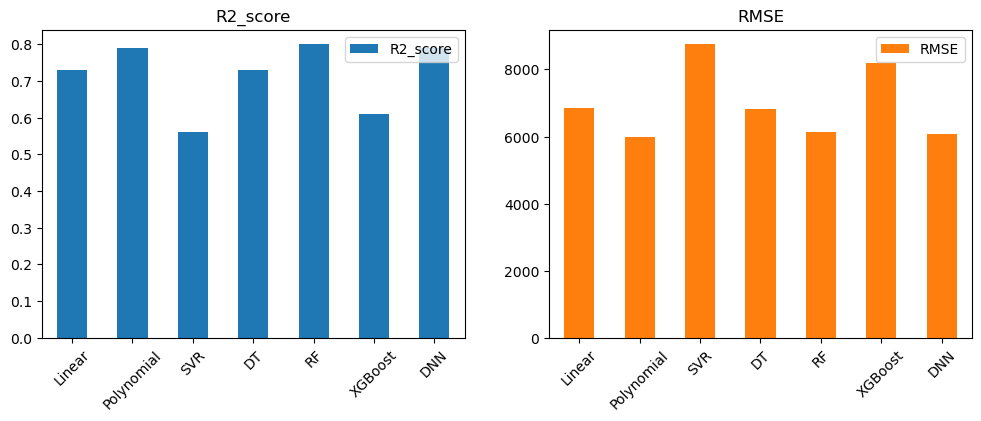

In [130]:
d = {'R2_score':[0.73, 0.79, 0.56, 0.73, 0.80, 0.61, 0.79],
     'RMSE': [6838.29, 5997.25, 8743.19, 6818.90, 6120.89, 8187.72, 6073.66]}
ind = ['Linear', 'Polynomial', 'SVR', 'DT', 'RF', 'XGBoost', 'DNN']
res = pd.DataFrame(d, index = ind)
res.plot.bar(rot=45, subplots=True, layout=(1,2), figsize=(12,4))

If we look at the above plot, performance of Polynomial, RF and DNN are very similar. At the same time, we can rule out the DT, Xgboost models. Also the SVR and linear regression models utilized the original data have lower metric scores as well.

Let's see how the prediction charges vs age looks like for the polynomial regression, RF and DNN models.

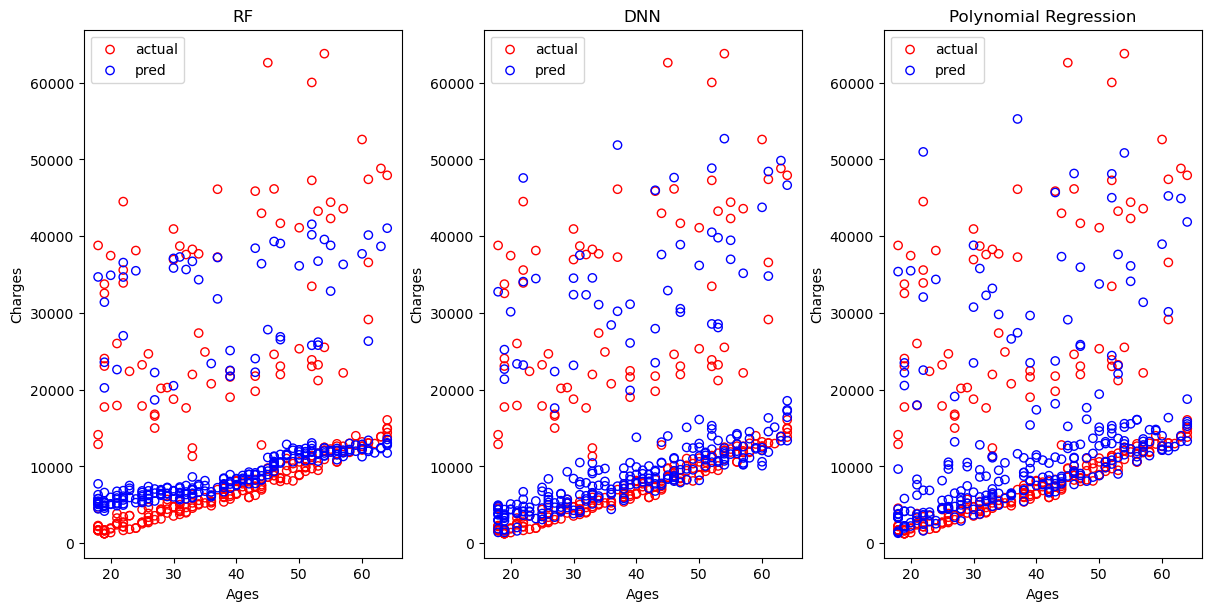

In [108]:
fig, axs = plt.subplots(1,3, figsize = (12,6), constrained_layout=True)
axs[0].scatter(x_test['age'], y_test, label = 'actual', edgecolors = 'red', facecolors = 'none')
axs[0].scatter(x_test['age'], ypred_test_rf, label = 'pred', edgecolors = 'blue', facecolors = 'none')
axs[0].set_xlabel('Ages')
axs[0].set_ylabel("Charges")
axs[0].set_title("RF")
#plt.ylim(0,10000)
axs[0].legend()

axs[1].scatter(x_test['age'], y_test, label = 'actual', edgecolors = 'red', facecolors = 'none')
axs[1].scatter(x_test['age'], ypred_test_dnn, label = 'pred', edgecolors = 'blue', facecolors = 'none')
axs[1].set_xlabel('Ages')
axs[1].set_ylabel("Charges")
axs[1].set_title("DNN")
#plt.ylim(0,10000)
axs[1].legend()

axs[2].scatter(x_test['age'], y_test, label = 'actual', edgecolors = 'red', facecolors = 'none')
axs[2].scatter(x_test['age'], ypred_test_psgd, label = 'pred', edgecolors = 'blue', facecolors = 'none')
axs[2].set_xlabel('Ages')
axs[2].set_ylabel("Charges")
axs[2].set_title("Polynomial Regression")
#plt.ylim(0,10000)
axs[2].legend()
plt.show()

### Conclusion
If we look at both the predictions of low and high insurance charges, DNN seems to doing the best job for low insurance charges and RF seems to doing a better job in predicting high insurance charges. Polynomial prediction has little more deviation from the actual values at both high and low charges.

From our modeling procedure, we should use DNN model if we want better accuracy for the lower charge prediction (< 15,000 dollars) and RF model for better accuracy at high charge prediction (> 15,000 dollars).